In [ ]:
print("hello")

hello


In [3]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
apiKey = 'VL2NjmhS5YCggYbjP2VlIsGtM'
apiKeySecret = 'GPCwOovDEhZNk3ZromvnCPESMHxz84R6mhPPCWmnqqR85Ejzf0'
bearerToken = 'AAAAAAAAAAAAAAAAAAAAANmhYAEAAAAA4NdOXhX%2FeMGLEHzDscDsHCoyRCs%3Dpc7OBlY1FTMeVxxZ7r1qGLvoM2eF33qng5BV9obD2fEQsecCVN'
accesToken = '1161380196051816449-xRGW5D1LctoTTQRc3MrNrcT71jdLZY'
accesTokenSecret = '6f65J7onKa3r7zdLnJ4CJ3U2fPA7AIHrLJRxi9UaI7dbV'

In [5]:
authenticate = tweepy.OAuthHandler(apiKey, apiKeySecret)
authenticate.set_access_token(accesToken, accesTokenSecret)

api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [6]:
posts = api.search(q='#parkinson', count=500, lang="en", tweet_mode="extended")

for tweet in posts[0:99]:
  print(tweet.full_text + '\n')

RT @nubentos: Now available in Nubentos #i4park the API for #parkinson disease patients monitoring by @i4_LIFE  

Keep a daily record of th…

Do you want to help your patients with  #parkinson to monitor the evolution of their disease?🙌🏻

Trust #i4Park, the @i4life solution in Nubentos that will allow you to generate detailed reports on the progress and follow-up of your Parkinson's patients ▶ https://t.co/61kgMJZGsA

RT @PWRGymTucson: We are taking names and emails for when our PWR! Retreat registration opens. Plus, the first 15 paid attendees will be en…

We are taking names and emails for when our PWR! Retreat registration opens. Plus, the first 15 paid attendees will be entered into a drawing to win some GREAT prizes! You won’t want to miss this opportunity!
https://t.co/AaJvulMXEH
or Link in Bio
#pwrretreat #parkinson https://t.co/CAYBkxQBO1

RT @SomusGlobal: 🕺 @ENBallet's Dance for Parkinson’s program gives those who suffer from the disease an opportunity to experience #dance as…

In [7]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,RT @nubentos: Now available in Nubentos #i4par...
1,Do you want to help your patients with #parki...
2,RT @PWRGymTucson: We are taking names and emai...
3,We are taking names and emails for when our PW...
4,RT @SomusGlobal: 🕺 @ENBallet's Dance for Parki...


In [8]:
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text)
  text = re.sub(r'#','',text)
  text = re.sub(r'RT[\s]+','',text)
  text = re.sub(r'http?s:\/\/\S+','',text)#Remove hyper link
  return text
df['Tweets'] = df['Tweets'].apply(cleanTxt)
df

,Tweets
0,: Now available in Nubentos i4park the API for...
1,Do you want to help your patients with parkin...
2,: We are taking names and emails for when our ...
3,We are taking names and emails for when our PW...
4,: 🕺 's Dance for Parkinson’s program gives tho...
...,...
95,: Class II evidence that sustained increase in...
96,: Class II evidence that sustained increase in...
97,Class II evidence that sustained increase in o...
98,": Stephanie Seneff, Ph.D., senior research sci..."


In [9]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity


df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


df

,Tweets,Subjectivity,Polarity
0,: Now available in Nubentos i4park the API for...,0.200000,0.200000
1,Do you want to help your patients with parkin...,0.750000,0.400000
2,: We are taking names and emails for when our ...,0.333333,0.250000
3,We are taking names and emails for when our PW...,0.494444,0.683333
4,: 🕺 's Dance for Parkinson’s program gives tho...,0.000000,0.000000
...,...,...,...
95,: Class II evidence that sustained increase in...,0.129945,0.025000
96,: Class II evidence that sustained increase in...,0.129945,0.025000
97,Class II evidence that sustained increase in o...,0.178297,0.075000
98,": Stephanie Seneff, Ph.D., senior research sci...",1.000000,-0.600000


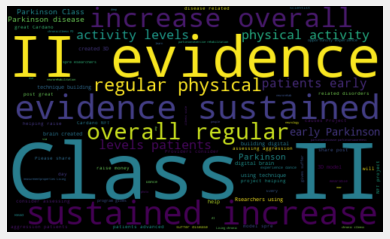

In [10]:
allWords =' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300,random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')

plt.show()

In [11]:
#negative , neutral and positive analysis

def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,: Now available in Nubentos i4park the API for...,0.200000,0.200000,Positive
1,Do you want to help your patients with parkin...,0.750000,0.400000,Positive
2,: We are taking names and emails for when our ...,0.333333,0.250000,Positive
3,We are taking names and emails for when our PW...,0.494444,0.683333,Positive
4,: 🕺 's Dance for Parkinson’s program gives tho...,0.000000,0.000000,Neutral
...,...,...,...,...
95,: Class II evidence that sustained increase in...,0.129945,0.025000,Positive
96,: Class II evidence that sustained increase in...,0.129945,0.025000,Positive
97,Class II evidence that sustained increase in o...,0.178297,0.075000,Positive
98,": Stephanie Seneff, Ph.D., senior research sci...",1.000000,-0.600000,Negative


In [12]:
#positive tweets
sortedDF = df.sort_values(by=['Polarity'])

for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(sortedDF['Tweets'][i])
    print()

: Now available in Nubentos i4park the API for parkinson disease patients monitoring by _LIFE  

Keep a daily record of th…

Do you want to help your patients with  parkinson to monitor the evolution of their disease?🙌🏻

Trust i4Park, the  solution in Nubentos that will allow you to generate detailed reports on the progress and follow-up of your Parkinson's patients ▶ 

: We are taking names and emails for when our PWR! Retreat registration opens. Plus, the first 15 paid attendees will be en…

We are taking names and emails for when our PWR! Retreat registration opens. Plus, the first 15 paid attendees will be entered into a drawing to win some GREAT prizes! You won’t want to miss this opportunity!

or Link in Bio
pwrretreat parkinson 

Please share our post about great Cardano NFT project that’s helping raise money for Parkinson’s causes
Project even got a shout out on NBC’s TODAY show!
Would appreciate help with retweet!
Whitelisting@


 

: Please share our post about great Cardano 

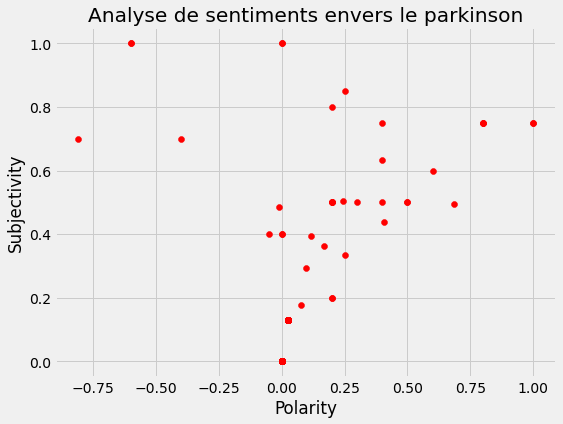

In [13]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i],color='Red' )

plt.title('Analyse de sentiments envers le parkinson')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.show()


In [14]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round( (ptweets.shape[0] / df.shape[0])*100, 1)


67.0

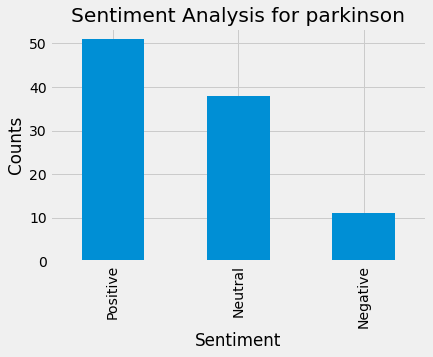

In [ ]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis for parkinson')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()